### Light Gradient

In [2]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024MuestraEscalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.816667,1.00,0.200000,0.454545,1.0,0.833333,1.0,0.021028,0.103545,1.0,0.0,0.762202,0.508594,0.790541,0.015789,0.376543,0.413793,0.007042,0.004032,0.0
1,0.358333,0.75,0.333333,0.363636,1.0,0.256410,1.0,0.011682,0.166548,1.0,0.0,0.637591,0.494922,0.702704,0.010526,0.135802,0.172414,0.510563,0.584677,0.0
2,0.700000,0.75,1.000000,0.545455,0.5,0.846154,0.5,0.007009,0.047407,0.5,0.0,0.720146,0.375000,0.318244,0.005263,0.432099,0.448276,0.292254,0.612903,0.5
3,0.541667,0.50,0.033333,0.636364,0.5,0.935897,0.5,0.032710,0.204610,0.5,0.0,0.084112,0.941406,0.298647,0.084211,0.259259,0.137931,0.598592,0.673387,0.5
4,0.016667,0.25,0.666667,1.000000,1.0,0.525641,1.0,0.009346,0.332200,0.5,0.0,0.478712,0.604492,0.656082,0.005263,0.135802,0.206897,0.478873,0.564516,0.0


In [ ]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1922
[LightGBM] [Info] Number of data points in the train set: 22968, number of used features: 19
[LightGBM] [Info] Start training from score 0.096685
Mean Squared Error (MSE): 0.00014538574954597885
Root Mean Squared Error (RMSE): 0.012057601318088886
R-squared (R2): 0.9918585229727191


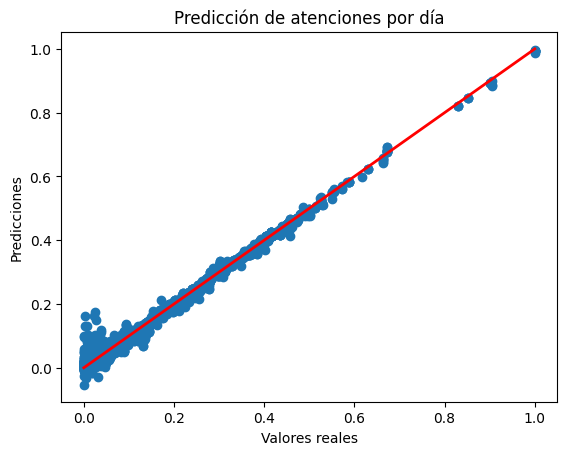

In [4]:
#Hacer modelo LightGradientBoost

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=32, random_state=42)

lgbm.fit(X_train, y_train)

# Predecir sobre datos de prueba

y_pred = lgbm.predict(X_test)
# Evaluar el modelo
#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicción vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Línea de referencia')  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción de atenciones por día')
plt.show()

In [5]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = lgbm.predict(X_train)

# Calcular el error cuadrático medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las métricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 9.15929674415068e-05
Root Mean Squared Error (RMSE) en entrenamiento: 0.00957042148713978
R-squared (R2) en entrenamiento: 0.9948437265137166


Datos totales 

In [6]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024Escalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,0.658333,0.00,0.666667,0.090909,0.5,0.551282,0.5,0.224299,0.470346,1.0,0.0,0.188993,0.824805,0.225001,0.231579,0.456790,0.310345,0.735915,0.806452,0.5
1,0.733333,0.75,0.166667,0.727273,1.0,0.397436,1.0,0.299065,0.133948,0.5,0.0,0.917965,0.106055,0.702703,0.000000,0.259259,0.344828,0.341549,0.491935,0.0
2,0.741667,1.00,0.133333,0.545455,1.0,0.397436,1.0,0.329439,0.140723,1.0,0.0,0.481828,0.593262,0.809460,0.015789,0.000000,0.000000,0.489437,0.576613,0.0
3,0.533333,0.25,0.333333,0.363636,1.0,0.756410,1.0,0.105140,0.044797,0.5,0.0,0.679128,0.394531,0.635136,0.000000,0.308642,0.379310,0.170775,0.223790,0.0
4,0.725000,0.75,0.700000,0.272727,1.0,0.397436,1.0,0.334112,0.087805,0.0,0.0,0.461059,0.633984,0.668919,0.010526,0.197531,0.241379,0.450704,0.572581,0.0


In [ ]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1938
[LightGBM] [Info] Number of data points in the train set: 76559, number of used features: 19
[LightGBM] [Info] Start training from score 0.098165
Mean Squared Error (MSE): 9.496951562049884e-05
Root Mean Squared Error (RMSE): 0.009745230403664084
R-squared (R2): 0.994701741232149


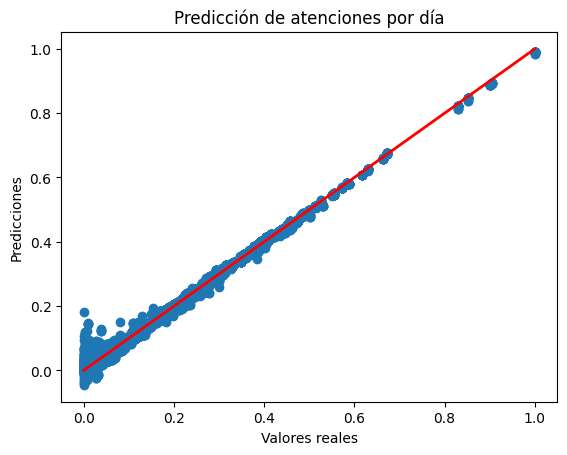

In [8]:
#Hacer modelo LightGradientBoost

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=32, random_state=42)

lgbm.fit(X_train, y_train)

# Predecir sobre datos de prueba

y_pred = lgbm.predict(X_test)
# Evaluar el modelo
#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicción vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Línea de referencia')  # Línea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción de atenciones por día')
plt.show()

In [9]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = lgbm.predict(X_train)

# Calcular el error cuadrático medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las métricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 8.188424533629657e-05
Root Mean Squared Error (RMSE) en entrenamiento: 0.009048991398840899
R-squared (R2) en entrenamiento: 0.9954733288230678
